# **Import libraries**

In [15]:
import pandas as pd      # pandas is used to handle tables of data (DataFrames) and do data analysis
import numpy as np       # numpy is used for numeric calculations

# Visualization Libraries
import matplotlib.pyplot as plt  # matplotlib is used to make charts and plots
import seaborn as sns            # seaborn is a library built on matplotlib for nicer
sns.set_style('whitegrid')       # sets the background style of plots to have a white grid (looks clean)


from sklearn.model_selection import train_test_split  # splits data into training and testing sets
from sklearn.ensemble import RandomForestClassifier   # Random Forest ML model for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy_score → checks how correct the model is

from google.colab import files  # allows you to upload files from your computer into Google Colab

# **Data Loading and Initial Inspection**

In [16]:
# Upload CSV (Colab local storage)
print("Please upload the 'train.csv' file now:")
uploaded = files.upload()

# Automatically pick the first CSV uploaded
file_name = next(iter(uploaded))

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)


Please upload the 'train.csv' file now:


Saving train.csv to train (5).csv


In [17]:
# Print the shape of the DataFrame
print("\nDataFrame Shape (Rows, Columns):", df.shape)


DataFrame Shape (Rows, Columns): (15120, 56)


In [18]:
# Print the head
print("\nFirst 5 Rows of the DataFrame:")
print(df.head())


First 5 Rows of the DataFrame:
   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...           

In [19]:
# Print the tail
print("\nLast 5 Rows of the DataFrame:")
print(df.tail())


Last 5 Rows of the DataFrame:
          Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type

In [20]:
# describe the DataFrame
print("\nSummary of the DataFrame:")
print(df.describe())


Summary of the DataFrame:
                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                  

In [21]:
# print columns
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_

In [22]:
# print the data types
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Typ

# **Data Pre-Process**

In [23]:
# print total numbers of missing values
print("\nTotal Missing Values:", df.isnull().sum().sum())


Total Missing Values: 0


In [24]:
# count total duplicate values
print("\nTotal Duplicate Rows:", df.duplicated().sum())


Total Duplicate Rows: 0


# **Exploratory Data Analysis (EDA) - Target Variable**

/tmp/ipython-input-719792791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


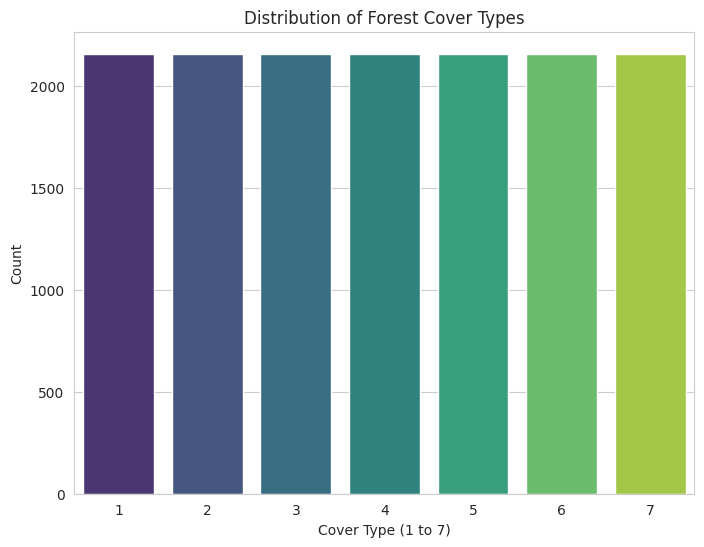

Cover Type Distribution (Counts):
Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64


In [25]:
# Check the distribution of the target variable 'Cover_Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type (1 to 7)')
plt.ylabel('Count')
plt.show()
print("Cover Type Distribution (Counts):")
print(df['Cover_Type'].value_counts().sort_index())

# 1 - Spruce/Fir
# 2 - Lodgepole Pine
# 3 - Ponderosa Pine
# 4 - Cottonwood/Willow
# 5 - Aspen
# 6 - Douglas-fir
# 7 - Krummholz

# **Feature Engineering (Simplification)**

In [26]:
# Drop the 'Id' column as it's just an index and not a feature
df = df.drop('Id', axis=1)

# Separate features (X) and target (y)
# The last column is 'Cover_Type'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Display the feature columns and target variable
print("Features (X) Shape:", X.shape)
print("Target (y) Shape:", y.shape)
print("\nFeature Columns:")
print(X.columns.tolist())

Features (X) Shape: (15120, 54)
Target (y) Shape: (15120,)

Feature Columns:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


# **Data Splitting**

In [27]:
# Split the data into training and testing sets
# I use 80% for training and 20% for testing
# 'random_state' ensures I get the same split every time
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Total samples: {len(df)}")
print(f"Training samples (80%): {len(X_train)}")
print(f"Testing samples (20%): {len(X_test)}")
print("\nSplit complete.")

Total samples: 15120
Training samples (80%): 12096
Testing samples (20%): 3024

Split complete.


# **Model Training - Random Forest Classifier**

In [28]:
# Initialize the Random Forest Classifier
# n_estimators=100 (number of trees) is a good default
print("Initializing Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model using the training data
print("Training the model...")
model.fit(X_train, y_train)
print("\nModel training completed!")

Initializing Random Forest Classifier...
Training the model...

Model training completed!


# **Model Evaluation - Predictions and Metrics**

In [29]:
# Function to calculate and print ML metrics
def print_classification_metrics(name, y_true, y_pred):
    """
    Prints Accuracy, Precision, Recall, and F1-Score.
    Uses 'weighted' average so it works for multi-class datasets.
    """
    print(f"\n--- {name} Metrics ---")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Generate predictions using the model
y_pred_test = model.predict(X_test)    # Predictions on unseen test data
y_pred_train = model.predict(X_train)  # Predictions on training data (checks overfitting)

# Print final evaluation metrics
print_classification_metrics("Test Set", y_test, y_pred_test)
print_classification_metrics("Training Set", y_train, y_pred_train)



--- Test Set Metrics ---
Accuracy : 0.8552
Precision: 0.8522
Recall   : 0.8552
F1 Score : 0.8524

--- Training Set Metrics ---
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


# **Feature Importance**

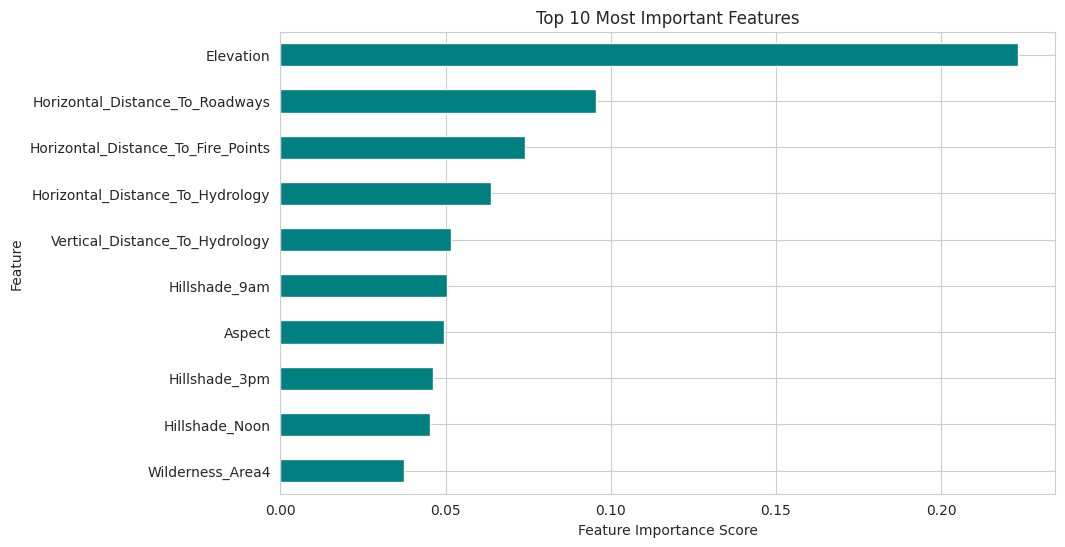


Top 10 Features Driving the Prediction:
Elevation                             0.223352
Horizontal_Distance_To_Roadways       0.095550
Horizontal_Distance_To_Fire_Points    0.074043
Horizontal_Distance_To_Hydrology      0.063634
Vertical_Distance_To_Hydrology        0.051701
Hillshade_9am                         0.050327
Aspect                                0.049419
Hillshade_3pm                         0.046229
Hillshade_Noon                        0.045409
Wilderness_Area4                      0.037455
dtype: float64


In [30]:
# Get feature importances from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort the features by importance and take the top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Highest importance at the top
plt.show()

print("\nTop 10 Features Driving the Prediction:")
print(top_10_features)

# **Predict using New Test Data**

In [49]:
# Enter your new input data here (must match 54 features)
# (10 columns)
new_data = pd.DataFrame([{
    'Elevation': 2600,
    'Aspect': 53,
    'Slope': 4,
    'Horizontal_Distance_To_Hydrology': 260,
    'Vertical_Distance_To_Hydrology': 2,
    'Horizontal_Distance_To_Roadways': 500,
    'Hillshade_9am': 222,
    'Hillshade_Noon': 230,
    'Hillshade_3pm': 150,
    'Horizontal_Distance_To_Fire_Points': 6300,

    # Wilderness Areas (4 columns)
    'Wilderness_Area1': 1, 'Wilderness_Area2': 0,
    'Wilderness_Area3': 0, 'Wilderness_Area4': 0,

    # Soil Types (40 columns)
    'Soil_Type1': 0, 'Soil_Type2': 0, 'Soil_Type3': 0, 'Soil_Type4': 0,
    'Soil_Type5': 0, 'Soil_Type6': 0, 'Soil_Type7': 0, 'Soil_Type8': 0,
    'Soil_Type9': 0, 'Soil_Type10': 0, 'Soil_Type11': 0, 'Soil_Type12': 0,
    'Soil_Type13': 0, 'Soil_Type14': 0, 'Soil_Type15': 0, 'Soil_Type16': 0,
    'Soil_Type17': 0, 'Soil_Type18': 0, 'Soil_Type19': 0, 'Soil_Type20': 0,
    'Soil_Type21': 0, 'Soil_Type22': 0, 'Soil_Type23': 0, 'Soil_Type24': 0,
    'Soil_Type25': 0, 'Soil_Type26': 0, 'Soil_Type27': 0, 'Soil_Type28': 0,
    'Soil_Type29': 1, 'Soil_Type30': 0, 'Soil_Type31': 0, 'Soil_Type32': 0,
    'Soil_Type33': 0, 'Soil_Type34': 0, 'Soil_Type35': 0, 'Soil_Type36': 0,
    'Soil_Type37': 0, 'Soil_Type38': 0, 'Soil_Type39': 0, 'Soil_Type40': 0
}])

# Match training columns
new_data = new_data[X_train.columns]

# Make prediction
predicted_value = model.predict(new_data)[0]

# Find confidence (probability)
predicted_probability = np.max(model.predict_proba(new_data)) * 100

# Forest type name
cover_type_map = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

forest_name = cover_type_map.get(predicted_value, "Unknown")

# Final Output (Only prediction)
print("\n--- FINAL PREDICTION ---")
print(f"Predicted Cover Type : {predicted_value} ({forest_name})")
print(f"Model Confidence     : {predicted_probability:.2f}%")



--- FINAL PREDICTION ---
Predicted Cover Type : 5 (Aspen)
Model Confidence     : 94.00%
